# ASE2010 Applied linear algebra: Final exam
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE2010: Applied Linear Algebra, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_
_<div style="text-align: right"> Jun-Hyon Cho (junhyoncho@inha.edu) </div>_
_<div style="text-align: right"> Jin Choi (jchoi@inha.edu) </div>_

<br>

<br>

<br>

---

## Soft landing of a reusable launcher

<br>

이산 시간 선형 동적 시스템은 아래와 같이 시간 $t$ ($t\in \{0,\dots,N-1\}$)에 따른 상태 벡터 $x_t \in \R^n$ 와 제어 입력 $u_t\in\R^m$으로 표현한다.

$$
\begin{aligned}
  x_{t+1} &= Ax_t + Bu_t
\end{aligned}
$$
<br>
$A$는 상태 천이 행렬이며, $B$는 입력 행렬이다. $A$와 $B$가 주어졌을 때, 우리의 목표는 종말 시간에 원하는 상태, 즉 $x_N= x_\text{des}$을 만족하는 최적의 입력 벡터 $u_0, \dots, u_{N-1}$를 찾는 것이다. 최소 에너지 $u_t$를 찾는 최적화 문제는 아래와 같이 기술할 수 있다.

$$
\begin{aligned}
  \underset{u}{\minimize} \quad & \sum_{t=0}^{N-1} \|u_t\|^2  \\
  \text{subject to} \quad & x_{t+1} = Ax_t + Bu_t, \qquad & t=0,\dots,N-1\\
  \quad & x_N = x_{\text{des}}
\end{aligned}
$$

이제 최소 에너지 제어 문제를 재사용 발사체의 착륙 문제에 적용하려고 한다. 상태 변수는 $x_t\in\R^4$이며, 첫번째 2개 변수는 발사체의 2차원 수평방향/고도방향 위치를 나타내고, 마지막 2개 변수는 발사체의 수평방향/고도방향 속도이다. 발사체의 제어 입력 $u_t\in\R^2$는 기동 가속도를 나타낸다. 발사체의 병진운동 동역학은 아래와 같이 표현할 수 있다.

$$
\bmat{p_x \\ p_y \\ v_x \\ v_y}_{t+1} = \underbrace{\bmat{
1 & 0 & \left(1-0.5\gamma {\Delta t}\right){\Delta t} & 0 \\
0 & 1 & 0 & \left(1-0.5\gamma {\Delta t}\right){\Delta t} \\
0 & 0 & 1-\gamma {\Delta t} & 0 \\
0  & 0 & 0 & 1-\gamma {\Delta t} \\
}}_{A}
\bmat{p_x \\ p_y \\ v_x \\ v_y}_t + \underbrace{\bmat{
0.5{\Delta t}^2 & 0 \\
0 & 0.5{\Delta t}^2 \\
{\Delta t} & 0 \\
0 & {\Delta t} & \\
}}_{B} \bmat{u_x \\ u_y}_t
+ \underbrace{\bmat{ 0 \\ -0.5{\Delta t}^2g \\ 0 \\ -{\Delta t}g}}_{b}
$$

위 식의 $p=(p_x,p_y)$, $v=(v_x,v_y)$는 각각 목표 착륙지점을 기준으로 한 발사체의 수평방향($x$)/고도방향($y$) 위치와 속도 벡터를 나타내며, $g$는 -고도 방향으로 작용하는 중력가속도를, $\gamma$는 항력에 의해 나타나는 댐핑 계수를 표현한다. 발사체의 초기 상태는 $x_0 = (-200,2000,40,-300)$, 총 비행시간은 $t_f=20$ 이며, 이를 이산화 시간 간격 $\Delta t=0.1$을 사용한 200 스텝($N=200$)으로 이산화한다. 댐핑계수는 $\gamma = 0.05$를 가정한다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 200
tf = 20
ts = np.linspace(0,tf,N+1)
dt = tf/N
gamma = .05
g = 9.8

A = np.array([[1, 0, (1-0.5*gamma*dt)*dt,                   0],
              [0, 1,                   0, (1-0.5*gamma*dt)*dt],
              [0, 0,        (1-gamma*dt),                   0],
              [0, 0,                   0,        (1-gamma*dt)]])
B = np.array([[0.5*dt**2,         0],
              [        0, 0.5*dt**2],
              [       dt,         0],
              [        0,        dt]])
b = np.array([0, -0.5*g*dt**2, 0, -g*dt])

x0 = np.array([-200, 2000, 40, -300])
x_des = np.array([0, 0, 0, 0])

우리는 $t_f=20$에 발사체가 목표 착륙지점에 속도 0으로 연착륙하기를 기대하므로, 종말 구속조건은 $x_N = x_\text{des}=0$으로 표현할 수 있다. 또한, 추가적으로 착륙하기 5초 전인 $t_1=15$에 위치와 수평 방향 속도 $v_x$에 대한 구속조건을 부여하여 조금 더 안정적인 착륙 궤적을 만들려고 한다. 해당 순간인 $t_1=15$에 발사체가 $w_\text{des}=(0,100)$을 수직방향 속도만 가진 채 통과하도록 구속조건을 추가한다.  

최종적으로 재사용 발사체의 최소 에너지 착륙 문제는 아래와 같이 표현할 수 있다.

<br>
$$
\begin{aligned}
  \underset{u}{\minimize} \quad & \sum_{t=0}^{199} \|u_t\|^2  \\
  \text{subject to} \quad & x_{t+1} = Ax_t + Bu_t + b\qquad & t=0,\dots,199\\
  \quad & x_{200} = x_{\text{des}}\\
  \quad & p_{150} = w_\text{des}  \\
  \quad & v_{x,150} = 0
\end{aligned}
$$

아래의 셀은 계산한 결과를 직관적으로 이해할 수 있도록, 상태변수와 제어입력을 시간에 대한 그래프로 표현하는 함수 `draw_plots()`와 착륙 궤적을 옆에서 보여주는 그래프 `draw_2d_traj()`를 담고 있다.  

In [22]:
# draw plots
def draw_plots(ts,x,u):
  # ts: time, (N+1,)-vector
  # x: state trajectory, 4x(N+1) matrix
  # u: control vector, 2xN matrix
    labels = [r'$p_x$',r'$p_y$',r'$v_x$',r'$v_y$',r'$u_x$',r'$u_y$']
    plt.figure(figsize=(14,9), dpi=100)
    for i in range(4):
        plt.subplot(3,2,i+1)
        plt.plot(ts,x[i],label=labels[i])
        plt.legend()
        plt.grid()
    for i in range(2):
        plt.subplot(3,2,i+5)
        plt.plot(ts[:-1],u[i],label=labels[i+4])
        plt.xlabel(r'$t$')
        plt.legend()
        plt.grid()
    plt.show()
    return

# draw 2D plot
def draw_2d_traj(x,u,t1):
  # x: state trajectory, 4x(N+1) matrix
  # u: control vector, 2xN matrix
    N = u.shape[1]
    plt.figure(figsize=(10,10), dpi=100)
    plt.title('Soft landing guidance')
    plt.plot(x[0,:],x[1,:], label='Trajectory')
    _ = 10

    for i in range(0, N, 10):
        __ = np.linalg.norm(u[:,i])/200
        plt.quiver(x[0,i],x[1,i],-u[0,i]*_,-u[1,i]*_, color='magenta', headwidth=1)
        plt.quiver(x[0,i],x[1,i],u[0,i]/__,u[1,i]/__, color='red', headlength=0, headaxislength=0)

    plt.plot(x[0,0], x[1,0], 'o', markersize=7, label='Initial position')
    plt.plot(x[0,t1], x[1,t1], '*', markersize=7, label=f'Waypoint #1')
    plt.plot(x[0,-1], x[1,-1], '^', markersize=7, label='Final position')

    plt.ylim(-200, 2200)
    plt.xlim(-600,600)
    plt.xlabel(r'$x$ position')
    plt.ylabel(r'$y$ position')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
    return

<br>

_**(Problem 2)**_ Least norm solution을 사용하여, 위 문제에 대한 최적의 기동과 그에 따른 궤적을 찾으시오. 시간에 따른 발사체의 위치, 속도, 제어 입력을 확인하고, 궤적을 확인하시오 (Plot은 주어진 함수 `draw_plots()`를 활용할 것). 착륙 시점의 위치와 속도를 확인하고, 경로점 통과 시간 ($t_1=15$)에서의 위치와 속도를 확인하시오. 착륙 과정 중에 사용된 전체 기동에너지($\sum_{t=0}^{199} \|u_t\|^2$)를 계산하시오.

$$
\begin{aligned}
  \underset{u}{\minimize} \quad & \sum_{t=0}^{199} \|u_t\|^2  \\
  \text{subject to} \quad & \bmat{x_{200}\\ x_{150}} = \bmat{A^{200}\\ A^{150}} x_0 + \bmat{A^{199}B & A^{198}B & \cdots & AB & B \\ A^{149}B & A^{148}B & \cdots & 0 & 0} \bmat{u_0 \\u_1 \\ \vdots \\ u_{t-2} \\ u_{t-1}} + \bmat{A^{199} & A^{198} & \cdots & A & I \\ A^{149} & A^{148} & \cdots & 0 & 0}\bmat{b \\b \\ \vdots \\ b \\ b}
\end{aligned}
$$

와 같은 최적화 문제로 정의된다.


$\begin{aligned}
\underset{u}{\text{minimize}} \quad & \sum_{t=0}^{199} \|u_t\|^2  \\
\text{subject to} \quad & \begin{bmatrix}x_{200}\\ x_{150}\end{bmatrix} = \begin{bmatrix}A^{200}\\ A^{150}\end{bmatrix} x_0 + \begin{bmatrix}A^{199}B & A^{198}B & \cdots & AB & B \\ A^{149}B & A^{148}B & \cdots & 0 & 0\end{bmatrix} \begin{bmatrix}u_0 \\u_1 \\ \vdots \\ u_{t-2} \\ u_{t-1}\end{bmatrix} + \begin{bmatrix}A^{199} & A^{198} & \cdots & A & I \\ A^{149} & A^{148} & \cdots & 0 & 0\end{bmatrix}\begin{bmatrix}b \\b \\ \vdots \\ b \\ b\end{bmatrix}
\end{aligned}$



이때 주어진 목적함수를 minimize하는 $u_{des}$ 는 least norm solution의 결과를 활용하면



$u_{\text{des}} = \left(\begin{bmatrix}A^{199}B & A^{198}B & \cdots & AB & B \\ A^{149}B & A^{148}B & \cdots & 0 & 0\end{bmatrix}\right)^{\dagger} \left( \begin{bmatrix}x_{200}\\ x_{150}\end{bmatrix} - \begin{bmatrix}A^{200}\\ A^{150}\end{bmatrix} x_0 - \begin{bmatrix}A^{199} & A^{198} & \cdots & A & I \\ A^{149} & A^{148} & \cdots & 0 & 0\end{bmatrix}\begin{bmatrix}b \\b \\ \vdots \\ b \\ b\end{bmatrix} \right)$
이다.

이때 목적함수 $\sum_{t=0}^{199} \|u_t\|^2  = u_{\text{des}}^T u_{\text{des}}$
  이고, $\begin{bmatrix}x_{200}\\ x_{150}\end{bmatrix} = \begin{bmatrix}0\\0\\0\\0\\0\\100\\0\\\lambda\end{bmatrix}$이다.

이때 주어진 목적함수는 $\lambda$ 에 대한 **2차 다항식**이 되고, **$\lambda$에 0,1,2를 대입한 후, 2차 다항식을 구한 후, 2차 다항식을 minimize하는 $\lambda$**를 찾으면 된다.

주어진  $u_{des}$ 를 간단하게 축약해보자.

$u_{des} = G^{\dagger} \left(\begin{bmatrix}0\\0\\0\\0\\0\\100\\0\\\lambda\end{bmatrix} -Z\right)$

이때 $\lambda$에 0,1,2를 대입한 후, 2차 다항식을 구한 후, 2차 다항식을 minimize하는 $\lambda$를 찾으면 된다.

In [39]:

G = np.zeros((8,2*N))

for i in range(N):

  G[:4, 2*i:2*(i+1)] = np.linalg.matrix_power(A,max(0,N-i-1))@B
  if i <150:
    G[4:, 2*i:2*(i+1)] =  np.linalg.matrix_power(A,max(0,N-i-51))@B
  else:
    continue


Z = np.zeros(8)
for i in range(N):
  Z[:4] += np.linalg.matrix_power(A,max(0,N-i-1))@b
  if i < 150:
    Z[4:] += np.linalg.matrix_power(A,max(0,N-i-51))@b
  else:
    continue

Z[:4] += np.linalg.matrix_power(A,200)@x0
Z[4:] += np.linalg.matrix_power(A,150)@x0
psu_G = np.linalg.pinv(G)
# 업데이트된 X 벡터 정의 ([0,0,0,0,0,100,0,lambda])
X = np.array([0, 0, 0, 0, 0, 100, 0, 0])
lambda_ = np.array([0, 0, 0, 0, 0, 0, 0, 1])

# 노름을 다시 계산하는 함수 정의
def norm_equation(lam):
    return np.linalg.norm(psu_G  @ (X + lam * lambda_ - Z))**2

# norm에 각각 0,1,2 대입
norm_0 = norm_equation(0)
norm_1 = norm_equation(1)
norm_2 = norm_equation(2)


# 2차 방정식의 계수 구하기
Q = np.array([
    [0**2, 0, 1],
    [1**2, 1, 1],
    [2**2, 2, 1]
])

c = np.array([norm_0, norm_1, norm_2])
gyesoo = np.linalg.solve(Q, c)
minimum_y_velocity = -gyesoo[1]/(2*gyesoo[0])
print(minimum_y_velocity )
u_des = psu_G@(np.array([0,0,0,0,0,100,0,minimum_y_velocity])-Z)
u = np.zeros((2,200))
current_x = x0
x = np.zeros((4,201))
x[0][0] = x0[0]
x[1][0] = x0[1]
x[2][0] = x0[2]
x[3][0] = x0[3]
for i in range(N):
  u[0][i],u[1][i] = u_des[2*i],u_des[2*i+1]
  current_x = A@current_x + B@np.array([u[0][i],u[1][i]]) + b
  x[0][i+1] = current_x[0]
  x[1][i+1] = current_x[1]
  x[2][i+1] = current_x[2]
  x[3][i+1] = current_x[3]



-33.11062052290241


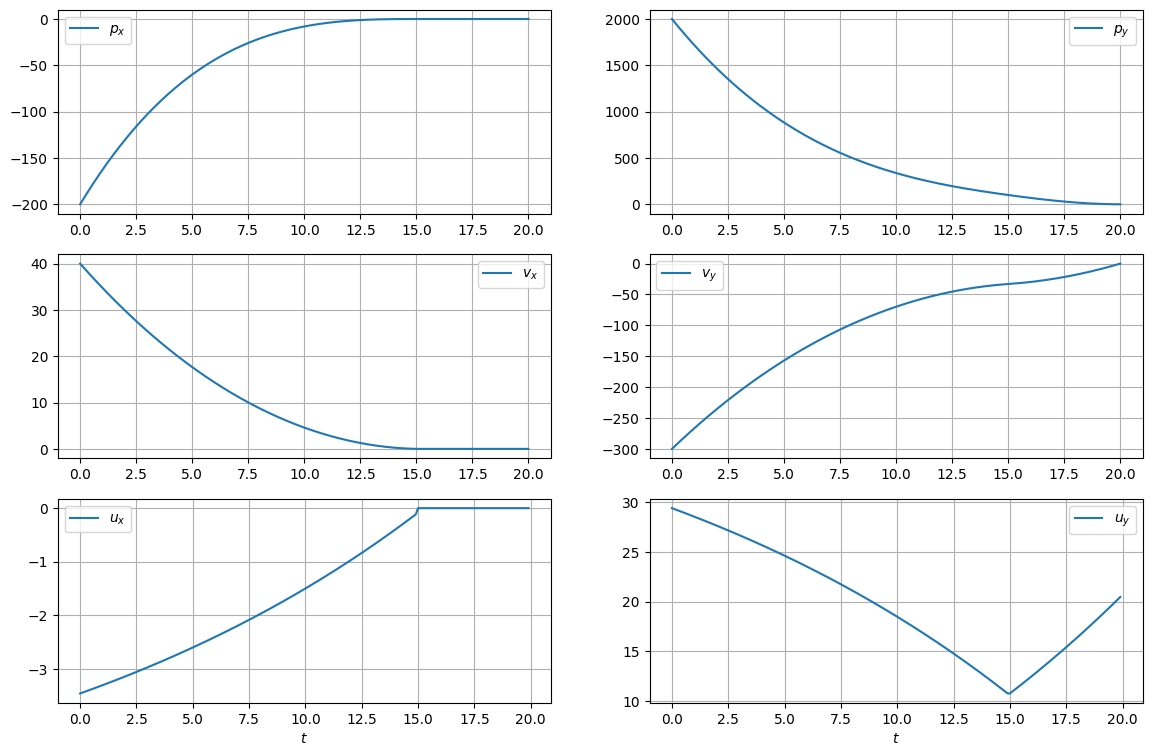

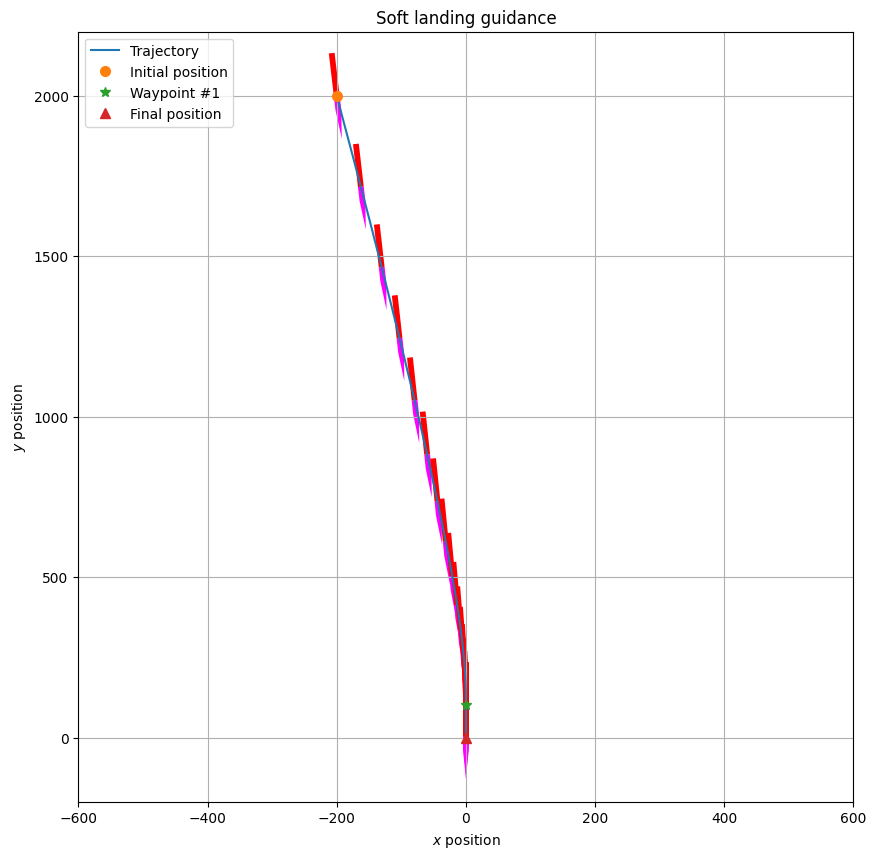

In [23]:
# draw plots
draw_plots(ts,x,u)
draw_2d_traj(x,u,150)

---

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def animate_2d_traj(x, u, t1):
    N = u.shape[1]
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    ax.set_xlim(-600, 600)
    ax.set_ylim(-200, 2200)
    ax.set_xlabel(r'$x$ position')
    ax.set_ylabel(r'$y$ position')
    ax.grid()

    line, = ax.plot([], [], label='Trajectory', lw=2)
    rocket_marker, = ax.plot([], [], 'ro', markersize=15)

    an1 = ax.annotate("", xy=(0, 0), xytext=(0, 0),
                    arrowprops={ "color": "magenta"})
    an2 = ax.annotate("", xy=(0, 0), xytext=(0, 0),
                    arrowprops={"arrowstyle": "-", "color": "gray","linewidth": 10})

    def init():
        line.set_data([], [])

        an1.set_position((0, 0))
        an1.xy = (0, 0)
        an2.set_position((0, 0))
        an2.xy = (0, 0)
        return line,  an1, an2

    def update(frame):
        line.set_data(x[0, :frame+1], x[1, :frame+1])
        ax.set_title(f"Time: {frame/10} seconds")
        scale = np.linalg.norm(u[:, frame]) / 200
        an1.set_position((x[0, frame], x[1, frame]))
        an1.xy = (x[0, frame] - u[0, frame] * 10, x[1, frame] - u[1, frame] * 10)
        an2.set_position((x[0, frame], x[1, frame]))
        an2.xy = (x[0, frame] + u[0, frame] / scale, x[1, frame] + u[1, frame] / scale)

        return line, an1, an2

    anim = FuncAnimation(fig, update, frames=N, init_func=init, blit=True, repeat=False,interval=100)
    plt.legend(loc='upper left')

    plt.close(fig)
    return HTML(anim.to_html5_video())




animate_2d_traj(x, u, 150)